# Problem Statement

# Setting up the environment

In [ ]:
%pip install --quiet fasttext-langdetect

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
%pip install --quiet deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
%pip install --quiet langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
%pip install --quiet langchain-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.9 MB/s eta 0:00:00


In [ ]:
%pip install --upgrade --quiet huggingface_hub

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator
from ftlangdetect import detect
from langsmith import traceable


import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [68]:
!export LANGSMITH_TRACING="true"
!export LANGSMITH_API_KEY="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"
!export LANGSMITH_PROJECT="pr-candid-theism-11"
!export LANGSMITH_ENDPOINT="https://api.smith.langchain.com"


# Data

In [ ]:
df = pd.read_excel('/content/purchase-order-items.xlsx', engine='openpyxl')

In [ ]:
df

,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,Project ID
0,3263831000000089042,NaN,75.21,227510.25,227510.25,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
1,3263831000000089046,NaN,15.00,47250.00,47250.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
2,3263831000000089044,NaN,50.00,160000.00,160000.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
3,3263831000000092044,NaN,12.00,38280.00,38280.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
4,3263831000000092052,NaN,2.00,5900.00,5900.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3145,3263831000016006011,"ITTIFAQ STEEL 14mm, 12 meter",30.00,69000.00,69000.00,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3146,3263831000016006009,"ITTIFAQ STEEL 12mm, 12 meter",30.00,69000.00,69000.00,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3147,3263831000016208289,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.00,69000.00,69000.00,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3148,3263831000016208285,حديد تسليح مجدول سعودي سابك 12 مم * 12 م,30.00,69000.00,69000.00,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item ID            3150 non-null   int64  
 1   Item Name          2910 non-null   object 
 2   Quantity           3150 non-null   float64
 3   Total Bcy          3150 non-null   float64
 4   Sub Total Bcy      3150 non-null   float64
 5   Purchase Order ID  3150 non-null   int64  
 6   Product ID         2910 non-null   float64
 7   Currency Code      3150 non-null   object 
 8   Account ID         3150 non-null   int64  
 9   Tax ID             3085 non-null   float64
 10  Project ID         0 non-null      float64
dtypes: float64(6), int64(3), object(2)
memory usage: 270.8+ KB


In [ ]:
# since Project ID is all missing
df = df.drop('Project ID', axis=1)

In [ ]:
print(f"The number of unique Item IDs is: {len(df['Item ID'].unique())}")

The number of unique Item IDs is: 3150


### Currency column

In [ ]:
print(df['Currency Code'].value_counts())

Currency Code
SAR    3085
USD      65
Name: count, dtype: int64


### Bcy columns

In [ ]:
(df["Total Bcy"] == df["Sub Total Bcy"]).all()

False

In [ ]:
Bcy = df[df["Total Bcy"] != df["Sub Total Bcy"]][['Total Bcy','Sub Total Bcy']]

In [ ]:
df[df["Total Bcy"] == df["Sub Total Bcy"]]['Currency Code'].value_counts()

,count
Currency Code,
SAR,3070
USD,65


In [ ]:
df[df["Total Bcy"] < df["Sub Total Bcy"]]['Currency Code'].value_counts()

,count
Currency Code,
SAR,15


In [ ]:
# group by 'Currency Code' and get the sum of 'Sub Total Bcy' and 'Total Bcy'
df.groupby('Currency Code').agg({'Sub Total Bcy': 'sum', 'Total Bcy': 'sum'})


,Sub Total Bcy,Total Bcy
Currency Code,,
SAR,1.515562e+08,1.515500e+08
USD,1.347573e+06,1.347573e+06


So, we have 2 conditions:

1. Sub Total Bcy and Total Bcy are equal in all USD and most of SAR	(3070 transaction)
2. Sub Total Bcy is greater than Total Bcy is minority in SAR

That likely means:

- For all USD transactions and most SAR transactions, Sub Total Bcy == Total Bcy. This suggests that in these cases, no additional deductions (like taxes, discounts, or fees) are applied.
- For a minority of SAR transactions, Sub Total Bcy > Total Bcy, meaning something (like a discount or adjustment) reduces the total from the subtotal.

We can explore this further by checking the taxes but we only have the Tax ID column.

For future modeling we can use only 1 column of them to avoid multicollinearity and redundancy.

### Quantity

count     3150.000000
mean       475.470797
std       2737.024475
min          0.150000
25%          7.000000
50%         30.000000
75%        130.000000
max      70000.000000
Name: Quantity, dtype: float64
Quantity
1.0      253
30.0     171
10.0     137
2.0      132
20.0     107
        ... 
127.0      1
289.0      1
310.0      1
165.0      1
860.0      1
Name: count, Length: 441, dtype: int64


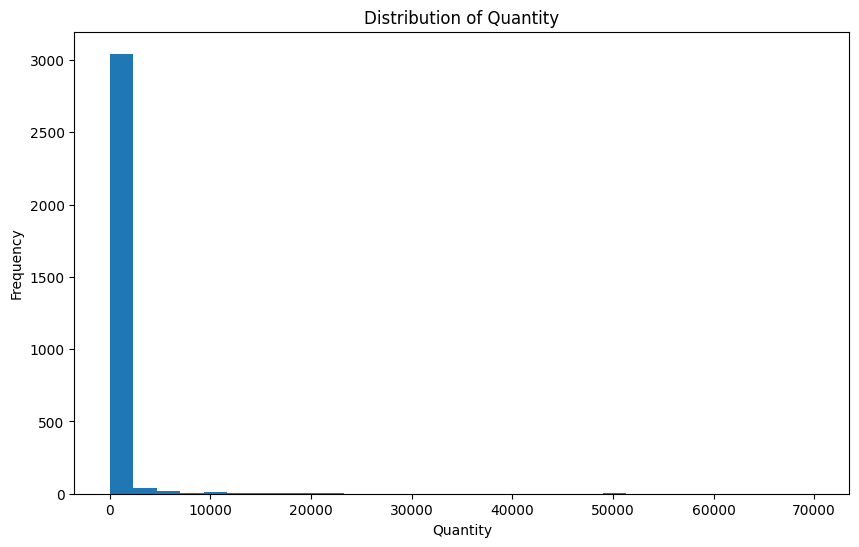

Number of zero quantities: 0
Number of negative quantities: 0


In [ ]:
# prompt: explore Quantity	column

# Explore the 'Quantity' column
print(df['Quantity'].describe())
print(df['Quantity'].value_counts())
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=30)  # Adjust the number of bins as needed
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

# Check for any zero or negative quantities
print(f"Number of zero quantities: {len(df[df['Quantity'] == 0])}")
print(f"Number of negative quantities: {len(df[df['Quantity'] < 0])}")

#Further analysis, if needed:
#Investigate rows with unusually high or low quantities.
#Check the relationship between 'Quantity' and other variables (e.g., 'Sub Total Bcy', 'Total Bcy')
#Consider creating new features based on 'Quantity' if useful for the analysis.


# Item Name

In [ ]:
df['Item Name'].value_counts()

In [ ]:
def detect_language(text):
    try:
        results = detect(text)
        return results['lang']
    except:
        return "unknown"



In [ ]:
df['language'] = df['Item Name'].apply(detect_language)

In [ ]:
df[df['language'] == 'ar']

In [ ]:
def translate_text(text, target='en'):
    translated = GoogleTranslator(source='auto', target=target).translate(text)
    return translated

In [ ]:
df['translated_item_name'] = df.apply(lambda row: translate_text(row['Item Name'], target='en') if row['language'] == 'ar' else row['Item Name'], axis=1)


In [ ]:
#as it took time
df.to_csv('./purchase-order-items-with-translation.csv', index=False)

In [ ]:
exp_df = df[['translated_item_name']]

In [ ]:

exp_df = exp_df.dropna(subset=['translated_item_name'])


In [ ]:

exp_df = exp_df.drop_duplicates(subset=['translated_item_name'])


In [ ]:
exp_df

In [ ]:
# prompt: use nltk to clean exp_df translated_item_name

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower() # lowercase
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    words = word_tokenize(text) # tokenization
    words = [w for w in words if not w in stop_words] # remove stopwords
    text = " ".join(words)
    return text

exp_df['cleaned_translated_item_name'] = exp_df['translated_item_name'].apply(clean_text)


In [ ]:
exp_df

In [ ]:

import json
# Convert the 'translated_item_name' column to a list.
translated_item_names = exp_df['translated_item_name'].tolist()

# Create a dictionary to store the data.
data_dict = {'translated_item_names': translated_item_names}

# Convert the dictionary to a JSON string.
json_data = json.dumps(data_dict, indent=4) # Use indent for pretty printing.


In [ ]:
translated_item_names

In [ ]:
!huggingface-cli login

In [ ]:
from langchain_community.llms import HuggingFaceEndpoint

In [ ]:
from getpass import getpass

HUGGINGFACEHUB_API_TOKEN = getpass()

In [ ]:
import os

os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

In [ ]:
from langchain_community.llms import HuggingFaceEndpoint
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate

In [ ]:
from langchain_huggingface.llms import HuggingFacePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model_id = "meta-llama/Meta-Llama-3-70B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=1000)
hf = HuggingFacePipeline(pipeline=pipe)

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/59.6k [00:00<?, ?B/s]

model-00001-of-00030.safetensors:   0%|          | 0.00/4.58G [00:00<?, ?B/s]

model-00002-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00003-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00005-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00006-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00007-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00008-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00009-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00010-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00011-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00012-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00013-of-00030.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00014-of-00030.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00015-of-00030.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

In [ ]:
repo_id = "meta-llama/Llama-3.1-405B-Instruct"

llm = HuggingFaceEndpoint(
    repo_id=repo_id,
    task="text-generation",
    max_new_tokens=1000,
    temperature=0.5,
    huggingfacehub_api_token=HUGGINGFACEHUB_API_TOKEN,
)

In [ ]:
instruction = """<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a helpful AI assistant, Given the following list of purchased items from our customers, categorize the items into logical taxnomies
              data: {translated_item_names}
              Your Answer should be like a list of title categories
              """

prompt = PromptTemplate.from_template(instruction)

In [ ]:
llm_chain = prompt | llm
response = llm_chain.invoke({"translated_item_names": translated_item_names[:200]})

In [ ]:
response

In [ ]:

response1_categories = [
    'Beam and Column Reinforcement',
    'Plates and Sheets',
    'Structural Steel Sections',
    'Fastenings and Fixings',
    'Cables and Wires',
    'Thermal Insulation',
    'Rebar',
    'Concrete Accessories',
    'Miscellaneous Items'
]


In [ ]:
# prompt: divide list to lists of len 200

def divide_chunks(l, n):
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]

# How many elements each
# list should have
n = 200

translated_item_names_chunks = list(divide_chunks(translated_item_names, n))


In [ ]:
len(translated_item_names_chunks)

In [ ]:
instruction = """<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a highly intelligent AI assistant. Your task is to categorize a given list of purchased items into well-defined, logical taxonomies.

### Instructions:
- **Input:** A list of item names purchased by customers.
- **Your Output:** A structured list of category titles that logically group the items.

### Guidelines:
1. **Identify common themes** among items and create appropriate category names.
2. **Ensure categories are broad but meaningful** (e.g., "Electronics" instead of "Smartphones").
3. **If needed, create subcategories** for better organization.
4. **Be adaptive:** If you recognize well-known industry-standard categories, use them.

### Data:
- **Purchased Items:** {translated_item_names}

Return only the final list of categories as a structured response.
"""



prompt = PromptTemplate.from_template(instruction)

In [ ]:
prompt

In [ ]:
llm_chain = prompt | llm
response = llm_chain.invoke({"translated_item_names": translated_item_names_chunks[0]})
response

In [ ]:
del prompt


response1_categories = [
    'Beam and Column Reinforcement',
    'Plates and Sheets',
    'Structural Steel Sections',
    'Fastenings and Fixings',
    'Cables and Wires',
    'Thermal Insulation',
    'Rebar',
    'Concrete Accessories',
    'Miscellaneous Items'
]


In [ ]:
categories2 = [
  {
    "category": "Beam and Column Reinforcement",
    "items": ["Steel armament 14 ml-spike", "Rebar Steel 20mm", "Rebar Steel 16mm", "Rebar Steel 12mm", "Rebar Steel 10mm"]
  },
  {
    "category": "Plates and Sheets",
    "items": ["Timber", "Wier mesh 10mm 2x4.5 20*20 sheet", "Plates and Sheets"]
  },
  {
    "category": "Structural Steel Sections",
    "items": ["Steel armament 20 mm", "Steel armament 16 mm", "Steel armament 14 mm", "Steel armament 12 mm", "Steel armament 10 mm"]
  },
  {
    "category": "Fastenings and Fixings",
    "items": ["G CLAMP", "WEICCO RUBBER LINED SPLIT CLAMP MODEL: WSC 110-116R", "WEICCO RUBBER LINED SPLIT CLAMP MODEL: WSC 45-51R", "WEICCO RUBBER LINED SPLIT CLAMP MODEL: WSC 17-23R", "WEICCO SPRINKLE PIPE HANGER MODEL: WPCS 60 (2")"]
  },
  {
    "category": "Cables and Wires",
    "items": ["Riyadh cable 35 mm", "Riyadh cable 25 mm", "4 ml Al -Fannar No. 12", "A gray fuss 25 ml", "2.5 Swedish AW"]
  },
  {
    "category": "Thermal Insulation",
    "items": ["Thermal Insulation Foam Concrete Works", "Thermal Insulation Polyurethane Works"]
  },
  {
    "category": "Rebar",
    "items": ["Rebar Saudi Alrajhi 10 mm * 12 Mtr", "Rebar Saudi Alrajhi 12 mm * 12 Mtr", "Rebar Saudi Alrajhi 14 mm * 12 Mtr", "Rebar Saudi Alrajhi 16 mm * 12 Mtr"]
  },
  {
    "category": "Concrete Accessories",
    "items": ["Concrete water tank total capacity 17 m3", "Concrete septic tank total capacity 17 m3"]
  },
  {
    "category": "Miscellaneous Items",
    "items": ["Roof top structure - structure roof rail high 46mm, length 3520mm", "Roof top structure STRUCTURE ROOF End Clamp for 35mm Thickness solar panel", "Roof top structure STRUCTURE ROOF L Feet", "Roof top structure - structure roof splice connector grop 200mm"]
  }
]